In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fsolve

In [87]:
# parameters in the model
beta=0.95 # discount factor (annual model)
gamma=3 # CRRA parameter in utility function
alp=0.35 # capital share in production function
de=0.05 # depreciation rate of capital

z=2 # factor by which TFP (technology) has increased

# utility function
u=lambda c: np.power(c,1-gamma)/(1-gamma)
up=lambda c: np.power(c,-gamma) # marginal utility function

# production function
f=lambda k: np.power(k,alp)

# marginal product function
fp=lambda k: alp*np.power(k,alp-1)

# inverse of f', used to calculate steady state capital kMax
fp_inv=lambda fp: np.power(alp/fp,1/(1-alp))

kold=fp_inv(1/beta-1+de) # steady state capital under old technology f(k)
knew=fp_inv((1/beta-1+de)/z) # steady state capital under new technology z*f(k)

cold=f(kold)+(1-de)*kold-kold # steady state consumption under f(k)
cnew=z*f(knew)+(1-de)*knew-knew # steady state consumption under z*f(k)

print('kold=',kold,', knew=',knew)
print('cold=',cold,', cnew=',cnew)



kold= 6.601951961604987 , knew= 19.17765184800777
cold= 1.6058131275031666 , cnew= 4.664639378068053


max Euler error= 5.941365455175429e-11 min Euler error= -0.017718569820647928


Text(0.5, 1.0, 'transition path for consumption c(t)')

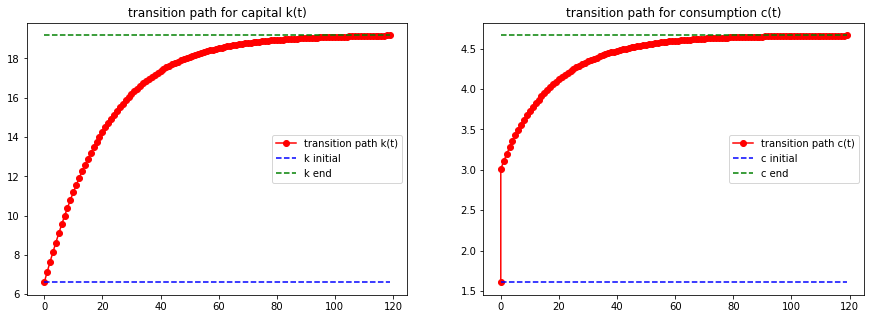

In [93]:
T=120 # ssume transition is complete in T periods

temp=np.linspace(kold,knew,T) # initial guess of capital during transition
kT_middle_guess=temp[1:T-1]

# function: 
# input: time series of k (start and end points fixed)
# output: calculate how much Euler equations are off
def fun_Euler_Equations(kT_middle):
    
    kT=np.hstack([kold,kT_middle,knew])
    
    # calculate consumption levels from kT
    cT=[np.nan]*T
    cT[0:T-1]=z*f(kT[0:T-1])+(1-de)*kT[0:T-1]-kT[1:T]
    cT[T-1]=z*f(kT[T-1])+(1-de)*kT[T-1]-kT[T-1]

    # evaluate how much Euler's are off
    EulerT=[np.nan]*T
    for t in np.arange(T):
        if t<=T-2:
            EulerT[t]=up(cT[t])-beta*(1-de+z*fp(kT[t]))*up(cT[t+1])
        else:
            EulerT[t]=up(cT[T-1])-beta*(1-de+z*fp(kT[T-1]))*up(cT[T-1])
    return EulerT[0:T-2]

# use nonlinear solver to solve for kT sequence
kT_middle=fsolve(fun_Euler_Equations,kT_middle_guess)

kT=np.hstack([kold,kT_middle,knew])
print('max Euler error=',max(fun_Euler_Equations(kT)),'min Euler error=',min(fun_Euler_Equations(kT)))

# calculate the corresponding consumption levels
cT=[np.nan]*T
cT[0:T-1]=z*f(kT[0:T-1])+(1-de)*kT[0:T-1]-kT[1:T]
cT[T-1]=z*f(kT[T-1])+(1-de)*kT[T-1]-kT[T-1]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.arange(T),kT,'ro-',np.arange(T),[kold]*T,'b--',np.arange(T),[knew]*T,'g--')
plt.legend(['transition path k(t)','k initial','k end'])
plt.title('transition path for capital k(t)')

plt.subplot(1,2,2)
plt.plot(np.hstack([0,np.arange(T)]),np.hstack([cold,cT]),'ro-',np.arange(T),[cold]*T,'b--',np.arange(T),[cnew]*T,'g--')
plt.legend(['transition path c(t)','c initial','c end'])
plt.title('transition path for consumption c(t)')

